In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/LukeB/Downloads/Final Project Data - Luke Sheldon =- Luke Sheldon - Sheet1.csv")
df

,Date,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,09/18/2010,WPI,Clark,4,5,2,3,9,8,0.222,...,0.750,6,7,0,0,1,1,10,6,2
1,09/25/2010,Coast Guard,Clark,7,5,1,1,15,16,0.067,...,0.000,6,2,0,0,2,1,15,12,1
2,10/02/2010,Clark,Wheaton,5,2,1,2,7,13,0.143,...,0.692,1,4,0,0,2,2,0,0,0
3,10/09/2010,Clark,Springfield,5,6,2,2,13,15,0.154,...,0.400,6,6,0,0,2,1,0,0,1
4,10/23/2010,MIT,Clark,3,5,1,0,19,7,0.053,...,0.429,5,2,0,0,1,0,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10/1/2022,Babson,Clark,2,7,2,0,22,4,0.091,...,0.250,10,2,0,0,1,0,10,10,0
81,10/8/2022,WPI,Clark,4,7,4,0,26,15,0.154,...,0.400,3,2,0,1,1,1,0,0,0
82,10/15/2022,Emerson,Clark,8,7,1,0,15,11,0.067,...,0.364,4,4,0,0,3,1,17,12,0
83,10/22/2022,Springfield,Clark,5,7,4,1,20,17,0.200,...,0.353,8,5,0,0,0,3,8,5,0


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df = df.drop(columns = "Date")

In [5]:
df_one_hot = df.copy()

In [6]:
df_label = df.copy()

In [7]:
####LABEL ENCODING####
c = 0
for value in df_label["Away Team"]:
    if value == "Clark":
        df_label.at[c,"Away Team"] = 1
    else:
        df_label.at[c,"Away Team"] = 0
    c = c + 1
df_label["Away Team"] = df_label["Away Team"].astype("int64")

c1 = 0
for value in df_label["Home Team"]:
    if value == "Clark":
        df_label.at[c1,"Home Team"] = 1
    else:
        df_label.at[c1,"Home Team"] = 0
    c1 = c1 + 1
df_label["Home Team"] = df_label["Home Team"].astype("int64")

df_label

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,0,1,4,5,2,3,9,8,0.222,0.375,...,0.750,6,7,0,0,1,1,10,6,2
1,0,1,7,5,1,1,15,16,0.067,0.063,...,0.000,6,2,0,0,2,1,15,12,1
2,1,0,5,2,1,2,7,13,0.143,0.154,...,0.692,1,4,0,0,2,2,0,0,0
3,1,0,5,6,2,2,13,15,0.154,0.133,...,0.400,6,6,0,0,2,1,0,0,1
4,0,1,3,5,1,0,19,7,0.053,0.000,...,0.429,5,2,0,0,1,0,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,2,7,2,0,22,4,0.091,0.000,...,0.250,10,2,0,0,1,0,10,10,0
81,0,1,4,7,4,0,26,15,0.154,0.000,...,0.400,3,2,0,1,1,1,0,0,0
82,0,1,8,7,1,0,15,11,0.067,0.000,...,0.364,4,4,0,0,3,1,17,12,0
83,0,1,5,7,4,1,20,17,0.200,0.059,...,0.353,8,5,0,0,0,3,8,5,0


In [8]:
####ONE HOT ENCODING####
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = ["Home Team","Away Team"]

for feature in features_to_encode:
    df_one_hot = encode_and_bind(df_one_hot, feature)
    
df_one_hot

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Home Team_WPI,Home Team_Wheaton,Away Team_Babson,Away Team_Clark,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton
0,4,5,2,3,9,8,0.222,0.375,5,6,...,1,0,0,1,0,0,0,0,0,0
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,0,0,0,0,0,0,0,1
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,0,0,0,0,0,1,0,0
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0,0,0,1,0,0,0,0,0,0
81,4,7,4,0,26,15,0.154,0.000,7,6,...,1,0,0,1,0,0,0,0,0,0
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0,0,0,1,0,0,0,0,0,0
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0,0,0,1,0,0,0,0,0,0


In [9]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
y = df_label["Result(Clark)"]
X = df_label.drop(columns = ["Result(Clark)"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.5384615384615384

In [14]:
precision_score(y_test, predictions_test, average = 'micro')

0.5384615384615384

In [15]:
y1 = df_one_hot["Result(Clark)"]
X1 = df_one_hot.drop(columns = ["Result(Clark)"])

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [17]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(X_train1,y_train1)

DecisionTreeClassifier(random_state=0)

In [18]:
predictions_test=clf.predict(X_test1)
accuracy_score(y_test1, predictions_test)

0.6538461538461539

In [19]:
precision_score(y_test1, predictions_test, average = 'micro')

0.6538461538461539

In [20]:
combined = pd.DataFrame(dict(actual=y_test1, predicted=predictions_test))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,14,0,1
1,2,0,1
2,4,1,3


In [21]:
####LOOKING THROUGH HYPERPARAMETERS####

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

dt_classifier = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train1, y_train1)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [22]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   H_Prev_Season          85 non-null     int64  
 1   A_Prev_Season          85 non-null     int64  
 2   FT_Home Goals          85 non-null     int64  
 3   FT_Away Goals          85 non-null     int64  
 4   H_Team Shots           85 non-null     int64  
 5   A_Team Shots           85 non-null     int64  
 6   H_Team Shot %          85 non-null     float64
 7   A_Team Shot %          85 non-null     float64
 8   H_Team SOG             85 non-null     int64  
 9   A_Team SOG             85 non-null     int64  
 10  H_Team SOG %           85 non-null     float64
 11  A_Team SOG %           85 non-null     float64
 12  HT_Corners             85 non-null     int64  
 13  AT_Corners             85 non-null     int64  
 14  HT_Red                 85 non-null     int64  
 15  AT_Red  

In [23]:
df_one_hot_t = df_one_hot.copy()

In [24]:
df_one_hot_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   H_Prev_Season          85 non-null     int64  
 1   A_Prev_Season          85 non-null     int64  
 2   FT_Home Goals          85 non-null     int64  
 3   FT_Away Goals          85 non-null     int64  
 4   H_Team Shots           85 non-null     int64  
 5   A_Team Shots           85 non-null     int64  
 6   H_Team Shot %          85 non-null     float64
 7   A_Team Shot %          85 non-null     float64
 8   H_Team SOG             85 non-null     int64  
 9   A_Team SOG             85 non-null     int64  
 10  H_Team SOG %           85 non-null     float64
 11  A_Team SOG %           85 non-null     float64
 12  HT_Corners             85 non-null     int64  
 13  AT_Corners             85 non-null     int64  
 14  HT_Red                 85 non-null     int64  
 15  AT_Red  

In [25]:
#df_one_hot_t = df_one_hot_t.drop(columns = ["FT_Home Goals","FT_Away Goals","HT_Red","AT_Red", "HT_Yellow", "AT_Yellow", "H_Team Shot %", "A_Team Shot %"])

In [26]:
df_one_hot_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   H_Prev_Season          85 non-null     int64  
 1   A_Prev_Season          85 non-null     int64  
 2   FT_Home Goals          85 non-null     int64  
 3   FT_Away Goals          85 non-null     int64  
 4   H_Team Shots           85 non-null     int64  
 5   A_Team Shots           85 non-null     int64  
 6   H_Team Shot %          85 non-null     float64
 7   A_Team Shot %          85 non-null     float64
 8   H_Team SOG             85 non-null     int64  
 9   A_Team SOG             85 non-null     int64  
 10  H_Team SOG %           85 non-null     float64
 11  A_Team SOG %           85 non-null     float64
 12  HT_Corners             85 non-null     int64  
 13  AT_Corners             85 non-null     int64  
 14  HT_Red                 85 non-null     int64  
 15  AT_Red  

In [27]:
####MESSING WITH DATA POINTS####
y2 = df_one_hot_t["Result(Clark)"]
specified_cols = ["A_Team SOG %"]
X2 = df_one_hot_t[specified_cols]

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [29]:
clf2 = DecisionTreeClassifier(random_state=0,criterion='gini')
clf2.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=0)

In [30]:
predictions_test=clf2.predict(X_test2)
accuracy_score(y_test2, predictions_test)

0.5

In [31]:
precision_score(y_test2, predictions_test, average = 'micro')

0.5

In [32]:
df_roll_avgs = df_one_hot.copy()

In [33]:
df_roll_avgs

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,Home Team_WPI,Home Team_Wheaton,Away Team_Babson,Away Team_Clark,Away Team_Coast Guard,Away Team_Emerson,Away Team_MIT,Away Team_Springfield,Away Team_WPI,Away Team_Wheaton
0,4,5,2,3,9,8,0.222,0.375,5,6,...,1,0,0,1,0,0,0,0,0,0
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,0,0,0,0,0,0,0,1
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,0,0,0,0,0,1,0,0
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0,0,0,1,0,0,0,0,0,0
81,4,7,4,0,26,15,0.154,0.000,7,6,...,1,0,0,1,0,0,0,0,0,0
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0,0,0,1,0,0,0,0,0,0
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0,0,0,1,0,0,0,0,0,0


In [34]:
####COMING BACK TO ROLLING AVERAGES####

In [35]:
df3 = df.copy()

In [36]:
df3

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,WPI,Clark,4,5,2,3,9,8,0.222,0.375,...,0.750,6,7,0,0,1,1,10,6,2
1,Coast Guard,Clark,7,5,1,1,15,16,0.067,0.063,...,0.000,6,2,0,0,2,1,15,12,1
2,Clark,Wheaton,5,2,1,2,7,13,0.143,0.154,...,0.692,1,4,0,0,2,2,0,0,0
3,Clark,Springfield,5,6,2,2,13,15,0.154,0.133,...,0.400,6,6,0,0,2,1,0,0,1
4,MIT,Clark,3,5,1,0,19,7,0.053,0.000,...,0.429,5,2,0,0,1,0,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Babson,Clark,2,7,2,0,22,4,0.091,0.000,...,0.250,10,2,0,0,1,0,10,10,0
81,WPI,Clark,4,7,4,0,26,15,0.154,0.000,...,0.400,3,2,0,1,1,1,0,0,0
82,Emerson,Clark,8,7,1,0,15,11,0.067,0.000,...,0.364,4,4,0,0,3,1,17,12,0
83,Springfield,Clark,5,7,4,1,20,17,0.200,0.059,...,0.353,8,5,0,0,0,3,8,5,0


In [37]:
opponent = []
teamteam = []
venue = []

count = 0


for team in df3["Home Team"]:
    if team == "Clark":
        teamteam.append(team)
        opponent.append(df3.at[count,"Away Team"])
        venue.append("Home")
    else:
        opponent.append(team)
        teamteam.append(df3.at[count,"Away Team"])
        venue.append("Away")
    count = count + 1


In [38]:
for i in range(len(teamteam)):
    print(opponent[i], " ", teamteam[i], " ", venue[i])

WPI   Clark   Away
Coast Guard   Clark   Away
Wheaton   Clark   Home
Springfield   Clark   Home
MIT   Clark   Away
Babson   Clark   Home
WPI   Clark   Home
Coast Guard   Clark   Home
Wheaton   Clark   Home
Springfield   Clark   Away
MIT   Clark   Home
Babson   Clark   Away
Babson   Clark   Home
Coast Guard   Clark   Home
Springfield   Clark   Away
WPI   Clark   Away
Wheaton   Clark   Away
MIT   Clark   Home
WPI   Clark   Home
Coast Guard   Clark   Away
Springfield   Clark   Away
Babson   Clark   Home
MIT   Clark   Away
Emerson   Clark   Home
Wheaton   Clark   Home
WPI   Clark   Away
Coast Guard   Clark   Home
Springfield   Clark   Home
Babson   Clark   Away
MIT   Clark   Home
Emerson   Clark   Away
Wheaton   Clark   Away
WPI   Clark   Home
Springfield   Clark   Away
Babson   Clark   Home
MIT   Clark   Away
Emerson   Clark   Home
Wheaton   Clark   Home
WPI   Clark   Away
Coast Guard   Clark   Home
Springfield   Clark   Home
Babson   Clark   Away
MIT   Clark   Home
Emerson   Clark   Away

In [39]:
df3["Team"] = teamteam
df3["Opponent"] = opponent
df3["Venue"] = venue
####ADDING NEW COLUMNS TEST####

In [40]:
df3

,Home Team,Away Team,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,...,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue
0,WPI,Clark,4,5,2,3,9,8,0.222,0.375,...,0,0,1,1,10,6,2,Clark,WPI,Away
1,Coast Guard,Clark,7,5,1,1,15,16,0.067,0.063,...,0,0,2,1,15,12,1,Clark,Coast Guard,Away
2,Clark,Wheaton,5,2,1,2,7,13,0.143,0.154,...,0,0,2,2,0,0,0,Clark,Wheaton,Home
3,Clark,Springfield,5,6,2,2,13,15,0.154,0.133,...,0,0,2,1,0,0,1,Clark,Springfield,Home
4,MIT,Clark,3,5,1,0,19,7,0.053,0.000,...,0,0,1,0,12,9,0,Clark,MIT,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Babson,Clark,2,7,2,0,22,4,0.091,0.000,...,0,0,1,0,10,10,0,Clark,Babson,Away
81,WPI,Clark,4,7,4,0,26,15,0.154,0.000,...,0,1,1,1,0,0,0,Clark,WPI,Away
82,Emerson,Clark,8,7,1,0,15,11,0.067,0.000,...,0,0,3,1,17,12,0,Clark,Emerson,Away
83,Springfield,Clark,5,7,4,1,20,17,0.200,0.059,...,0,0,0,3,8,5,0,Clark,Springfield,Away


In [41]:
df3.columns

Index(['Home Team', 'Away Team', 'H_Prev_Season', 'A_Prev_Season',
       'FT_Home Goals', 'FT_Away Goals', 'H_Team Shots', 'A_Team Shots',
       'H_Team Shot %', 'A_Team Shot %', 'H_Team SOG', 'A_Team SOG',
       'H_Team SOG %', 'A_Team SOG %', 'HT_Corners', 'AT_Corners', 'HT_Red',
       'AT_Red', 'HT_Yellow', 'AT_Yellow', 'HT_Fouls', 'AT_Fouls',
       'Result(Clark)', 'Team', 'Opponent', 'Venue'],
      dtype='object')

In [42]:
df4 = df.copy()

In [43]:
df4 = df4.drop(columns = ["Home Team","Away Team"])
df4

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark)
0,4,5,2,3,9,8,0.222,0.375,5,6,...,0.750,6,7,0,0,1,1,10,6,2
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0.000,6,2,0,0,2,1,15,12,1
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0.692,1,4,0,0,2,2,0,0,0
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0.400,6,6,0,0,2,1,0,0,1
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0.429,5,2,0,0,1,0,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0.250,10,2,0,0,1,0,10,10,0
81,4,7,4,0,26,15,0.154,0.000,7,6,...,0.400,3,2,0,1,1,1,0,0,0
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0.364,4,4,0,0,3,1,17,12,0
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0.353,8,5,0,0,0,3,8,5,0


In [44]:
df4["Team"] = teamteam
df4["Opponent"] = opponent
df4["Venue"] = venue
df4

,H_Prev_Season,A_Prev_Season,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,...,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue
0,4,5,2,3,9,8,0.222,0.375,5,6,...,0,0,1,1,10,6,2,Clark,WPI,Away
1,7,5,1,1,15,16,0.067,0.063,0,0,...,0,0,2,1,15,12,1,Clark,Coast Guard,Away
2,5,2,1,2,7,13,0.143,0.154,3,9,...,0,0,2,2,0,0,0,Clark,Wheaton,Home
3,5,6,2,2,13,15,0.154,0.133,7,6,...,0,0,2,1,0,0,1,Clark,Springfield,Home
4,3,5,1,0,19,7,0.053,0.000,8,3,...,0,0,1,0,12,9,0,Clark,MIT,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,7,2,0,22,4,0.091,0.000,10,1,...,0,0,1,0,10,10,0,Clark,Babson,Away
81,4,7,4,0,26,15,0.154,0.000,7,6,...,0,1,1,1,0,0,0,Clark,WPI,Away
82,8,7,1,0,15,11,0.067,0.000,5,4,...,0,0,3,1,17,12,0,Clark,Emerson,Away
83,5,7,4,1,20,17,0.200,0.059,7,6,...,0,0,0,3,8,5,0,Clark,Springfield,Away


In [45]:
b1 = df4.pop("H_Prev_Season")
b2 = df4.pop("A_Prev_Season")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Prev_Season"] = new_col1
df4

,FT_Home Goals,FT_Away Goals,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,...,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season
0,2,3,9,8,0.222,0.375,5,6,0.556,0.750,...,0,1,1,10,6,2,Clark,WPI,Away,5
1,1,1,15,16,0.067,0.063,0,0,0.000,0.000,...,0,2,1,15,12,1,Clark,Coast Guard,Away,5
2,1,2,7,13,0.143,0.154,3,9,0.429,0.692,...,0,2,2,0,0,0,Clark,Wheaton,Home,5
3,2,2,13,15,0.154,0.133,7,6,0.538,0.400,...,0,2,1,0,0,1,Clark,Springfield,Home,5
4,1,0,19,7,0.053,0.000,8,3,0.421,0.429,...,0,1,0,12,9,0,Clark,MIT,Away,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2,0,22,4,0.091,0.000,10,1,0.455,0.250,...,0,1,0,10,10,0,Clark,Babson,Away,7
81,4,0,26,15,0.154,0.000,7,6,0.269,0.400,...,1,1,1,0,0,0,Clark,WPI,Away,7
82,1,0,15,11,0.067,0.000,5,4,0.333,0.364,...,0,3,1,17,12,0,Clark,Emerson,Away,7
83,4,1,20,17,0.200,0.059,7,6,0.350,0.353,...,0,0,3,8,5,0,Clark,Springfield,Away,7


In [46]:
b1 = df4.pop("FT_Home Goals")
b2 = df4.pop("FT_Away Goals")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Goals"] = new_col1
df4

,H_Team Shots,A_Team Shots,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,...,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals
0,9,8,0.222,0.375,5,6,0.556,0.750,6,7,...,1,1,10,6,2,Clark,WPI,Away,5,3
1,15,16,0.067,0.063,0,0,0.000,0.000,6,2,...,2,1,15,12,1,Clark,Coast Guard,Away,5,1
2,7,13,0.143,0.154,3,9,0.429,0.692,1,4,...,2,2,0,0,0,Clark,Wheaton,Home,5,1
3,13,15,0.154,0.133,7,6,0.538,0.400,6,6,...,2,1,0,0,1,Clark,Springfield,Home,5,2
4,19,7,0.053,0.000,8,3,0.421,0.429,5,2,...,1,0,12,9,0,Clark,MIT,Away,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,22,4,0.091,0.000,10,1,0.455,0.250,10,2,...,1,0,10,10,0,Clark,Babson,Away,7,0
81,26,15,0.154,0.000,7,6,0.269,0.400,3,2,...,1,1,0,0,0,Clark,WPI,Away,7,0
82,15,11,0.067,0.000,5,4,0.333,0.364,4,4,...,3,1,17,12,0,Clark,Emerson,Away,7,0
83,20,17,0.200,0.059,7,6,0.350,0.353,8,5,...,0,3,8,5,0,Clark,Springfield,Away,7,1


In [47]:
b1 = df4.pop("H_Team Shots")
b2 = df4.pop("A_Team Shots")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Shots"] = new_col1
df4

,H_Team Shot %,A_Team Shot %,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,...,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots
0,0.222,0.375,5,6,0.556,0.750,6,7,0,0,...,1,10,6,2,Clark,WPI,Away,5,3,8
1,0.067,0.063,0,0,0.000,0.000,6,2,0,0,...,1,15,12,1,Clark,Coast Guard,Away,5,1,16
2,0.143,0.154,3,9,0.429,0.692,1,4,0,0,...,2,0,0,0,Clark,Wheaton,Home,5,1,7
3,0.154,0.133,7,6,0.538,0.400,6,6,0,0,...,1,0,0,1,Clark,Springfield,Home,5,2,13
4,0.053,0.000,8,3,0.421,0.429,5,2,0,0,...,0,12,9,0,Clark,MIT,Away,5,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.091,0.000,10,1,0.455,0.250,10,2,0,0,...,0,10,10,0,Clark,Babson,Away,7,0,4
81,0.154,0.000,7,6,0.269,0.400,3,2,0,1,...,1,0,0,0,Clark,WPI,Away,7,0,15
82,0.067,0.000,5,4,0.333,0.364,4,4,0,0,...,1,17,12,0,Clark,Emerson,Away,7,0,11
83,0.200,0.059,7,6,0.350,0.353,8,5,0,0,...,3,8,5,0,Clark,Springfield,Away,7,1,17


In [48]:
b1 = df4.pop("H_Team Shot %")
b2 = df4.pop("A_Team Shot %")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Shot %"] = new_col1
df4

,H_Team SOG,A_Team SOG,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %
0,5,6,0.556,0.750,6,7,0,0,1,1,10,6,2,Clark,WPI,Away,5,3,8,0.375
1,0,0,0.000,0.000,6,2,0,0,2,1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063
2,3,9,0.429,0.692,1,4,0,0,2,2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143
3,7,6,0.538,0.400,6,6,0,0,2,1,0,0,1,Clark,Springfield,Home,5,2,13,0.154
4,8,3,0.421,0.429,5,2,0,0,1,0,12,9,0,Clark,MIT,Away,5,0,7,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10,1,0.455,0.250,10,2,0,0,1,0,10,10,0,Clark,Babson,Away,7,0,4,0.000
81,7,6,0.269,0.400,3,2,0,1,1,1,0,0,0,Clark,WPI,Away,7,0,15,0.000
82,5,4,0.333,0.364,4,4,0,0,3,1,17,12,0,Clark,Emerson,Away,7,0,11,0.000
83,7,6,0.350,0.353,8,5,0,0,0,3,8,5,0,Clark,Springfield,Away,7,1,17,0.059


In [49]:
b1 = df4.pop("H_Team SOG")
b2 = df4.pop("A_Team SOG")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["SOG"] = new_col1
df4

,H_Team SOG %,A_Team SOG %,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG
0,0.556,0.750,6,7,0,0,1,1,10,6,2,Clark,WPI,Away,5,3,8,0.375,6
1,0.000,0.000,6,2,0,0,2,1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063,0
2,0.429,0.692,1,4,0,0,2,2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143,3
3,0.538,0.400,6,6,0,0,2,1,0,0,1,Clark,Springfield,Home,5,2,13,0.154,7
4,0.421,0.429,5,2,0,0,1,0,12,9,0,Clark,MIT,Away,5,0,7,0.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.455,0.250,10,2,0,0,1,0,10,10,0,Clark,Babson,Away,7,0,4,0.000,1
81,0.269,0.400,3,2,0,1,1,1,0,0,0,Clark,WPI,Away,7,0,15,0.000,6
82,0.333,0.364,4,4,0,0,3,1,17,12,0,Clark,Emerson,Away,7,0,11,0.000,4
83,0.350,0.353,8,5,0,0,0,3,8,5,0,Clark,Springfield,Away,7,1,17,0.059,6


In [50]:
b1 = df4.pop("H_Team SOG %")
b2 = df4.pop("A_Team SOG %")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["SOG %"] = new_col1
df4

,HT_Corners,AT_Corners,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %
0,6,7,0,0,1,1,10,6,2,Clark,WPI,Away,5,3,8,0.375,6,0.750
1,6,2,0,0,2,1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000
2,1,4,0,0,2,2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143,3,0.429
3,6,6,0,0,2,1,0,0,1,Clark,Springfield,Home,5,2,13,0.154,7,0.538
4,5,2,0,0,1,0,12,9,0,Clark,MIT,Away,5,0,7,0.000,3,0.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10,2,0,0,1,0,10,10,0,Clark,Babson,Away,7,0,4,0.000,1,0.250
81,3,2,0,1,1,1,0,0,0,Clark,WPI,Away,7,0,15,0.000,6,0.400
82,4,4,0,0,3,1,17,12,0,Clark,Emerson,Away,7,0,11,0.000,4,0.364
83,8,5,0,0,0,3,8,5,0,Clark,Springfield,Away,7,1,17,0.059,6,0.353


In [51]:
b1 = df4.pop("HT_Corners")
b2 = df4.pop("AT_Corners")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Corners"] = new_col1
df4

,HT_Red,AT_Red,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners
0,0,0,1,1,10,6,2,Clark,WPI,Away,5,3,8,0.375,6,0.750,7
1,0,0,2,1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2
2,0,0,2,2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1
3,0,0,2,1,0,0,1,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6
4,0,0,1,0,12,9,0,Clark,MIT,Away,5,0,7,0.000,3,0.429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,1,0,10,10,0,Clark,Babson,Away,7,0,4,0.000,1,0.250,2
81,0,1,1,1,0,0,0,Clark,WPI,Away,7,0,15,0.000,6,0.400,2
82,0,0,3,1,17,12,0,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4
83,0,0,0,3,8,5,0,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5


In [52]:
b1 = df4.pop("HT_Red")
b2 = df4.pop("AT_Red")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Red"] = new_col1
df4

,HT_Yellow,AT_Yellow,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red
0,1,1,10,6,2,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0
1,2,1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0
2,2,2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0
3,2,1,0,0,1,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0
4,1,0,12,9,0,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,0,10,10,0,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0
81,1,1,0,0,0,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1
82,3,1,17,12,0,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0
83,0,3,8,5,0,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0


In [53]:
b1 = df4.pop("HT_Yellow")
b2 = df4.pop("AT_Yellow")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Yellow"] = new_col1
df4

,HT_Fouls,AT_Fouls,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow
0,10,6,2,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0,1
1,15,12,1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0,1
2,0,0,0,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0,2
3,0,0,1,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0,2
4,12,9,0,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10,10,0,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0,0
81,0,0,0,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1,1
82,17,12,0,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0,1
83,8,5,0,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0,3


In [54]:
b1 = df4.pop("HT_Fouls")
b2 = df4.pop("AT_Fouls")
new_col1 = []

coun = 0
for val in df4["Venue"]:
    if val == "Home":
        new_col1.append(b1[coun])
    else:
        new_col1.append(b2[coun])
    coun = coun + 1
df4["Fouls"] = new_col1
df4

,Result(Clark),Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls
0,2,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0,1,6
1,1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0,1,12
2,0,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0,2,0
3,1,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0,2,0
4,0,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0,0,10
81,0,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1,1,0
82,0,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0,1,12
83,0,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0,3,5


In [55]:
b1 = df4.pop("Result(Clark)")
df4["Result"] = b1
df4

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0,1,6,2
1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0,1,12,1
2,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0,2,0,0
3,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0,2,0,1
4,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0,0,10,0
81,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1,1,0,0
82,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0,1,12,0
83,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0,3,5,0


In [56]:
####MAKING A METHOD TO DO THIS FOR ALL TEAMS####

In [57]:
fd = pd.read_csv("C:/Users/LukeB/Downloads/Final Project Data - Luke Sheldon =- Luke Sheldon - Sheet1.csv")

def new_df_spec(df, team):
    
    opponent = []
    teamteam = []
    venue = []

    count = 0

    for t in df["Home Team"]:
        if t == team:
            teamteam.append(team)
            opponent.append(df.at[count,"Away Team"])
            venue.append("Home")
        elif df.at[count,"Away Team"] == team:
            opponent.append(t)
            teamteam.append(df.at[count,"Away Team"])
            venue.append("Away")
        count = count + 1
    
    b1 = df.pop("H_Prev_Season")
    b2 = df.pop("A_Prev_Season")
    new_col1 = []

    coun = 0
    for val in df["Home Team"]:
        if val == team:
            new_col1.append(b1[coun])
        elif df.at[coun,"Away Team"] == team:
            new_col1.append(b2[coun])
        coun = coun + 1
        
    b3 = df.pop("FT_Home Goals")
    b4 = df.pop("FT_Away Goals")
    new_col2 = []

    coun1 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col2.append(b3[coun1])
        elif df.at[coun1,"Away Team"] == team:
            new_col2.append(b4[coun1])
        coun1 = coun1 + 1
    
    
    b5 = df.pop("H_Team Shots")
    b6 = df.pop("A_Team Shots")
    new_col3 = []

    coun2 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col3.append(b5[coun2])
        elif df.at[coun2,"Away Team"] == team:
            new_col3.append(b6[coun2])
        coun2 = coun2 + 1
    
    b7 = df.pop("H_Team Shot %")
    b8 = df.pop("A_Team Shot %")
    new_col4 = []

    coun3 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col4.append(b7[coun3])
        elif df.at[coun3,"Away Team"] == team:
            new_col4.append(b8[coun3])
        coun3 = coun3 + 1
    
    b9 = df.pop("H_Team SOG")
    b10 = df.pop("A_Team SOG")
    new_col5 = []

    coun4 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col5.append(b9[coun4])
        elif df.at[coun4,"Away Team"] == team:
            new_col5.append(b10[coun4])
        coun4 = coun4 + 1
    
    b11 = df.pop("H_Team SOG %")
    b12 = df.pop("A_Team SOG %")
    new_col6 = []

    coun5 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col6.append(b11[coun5])
        elif df.at[coun5,"Away Team"] == team:
            new_col6.append(b12[coun5])
        coun5 = coun5 + 1
        
    b13 = df.pop("HT_Corners")
    b14 = df.pop("AT_Corners")
    new_col7 = []

    coun6 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col7.append(b13[coun6])
        elif df.at[coun6,"Away Team"] == team:
            new_col7.append(b14[coun6])
        coun6 = coun6 + 1
    
    
    b15 = df.pop("HT_Red")
    b16 = df.pop("AT_Red")
    new_col8 = []

    coun7 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col8.append(b15[coun7])
        elif df.at[coun7,"Away Team"] == team:
            new_col8.append(b16[coun7])
        coun7 = coun7 + 1
    
    
    b17 = df.pop("HT_Yellow")
    b18 = df.pop("AT_Yellow")
    new_col9 = []

    coun8 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col9.append(b17[coun8])
        elif df.at[coun8,"Away Team"] == team:
            new_col9.append(b18[coun8])
        coun8 = coun8 + 1
    
    
    b19 = df.pop("HT_Fouls")
    b20 = df.pop("AT_Fouls")
    new_col10 = []

    coun9 = 0
    for val in df["Home Team"]:
        if val == team:
            new_col10.append(b19[coun9])
        elif df.at[coun9,"Away Team"] == team:
            new_col10.append(b20[coun9])
        coun9 = coun9 + 1
        
    
    b21 = df.pop("Result(Clark)")
    new_col11 = []
    coun10 = 0
    
    if team == "Clark":
        new_col11 = b21
    else:
        for val in df["Home Team"]: 
            if val == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            elif df.at[coun10,"Away Team"] == team:
                if b21[coun10] == 2:
                    new_col11.append(0)
                elif b21[coun10] == 1:
                    new_col11.append(1)
                elif b21[coun10] == 0:
                    new_col11.append(2)
            coun10 = coun10 + 1
           
    new_df = pd.DataFrame({
        "Team": teamteam[:len(teamteam)],
        "Opponent": opponent[:len(opponent)],
        "Venue": venue[:len(venue)],
        "Prev_Season": new_col1[:len(new_col1)],
        "Goals": new_col2[:len(new_col2)],
        "Shots": new_col3[:len(new_col3)],
        "Shot %": new_col4[:len(new_col4)],
        "SOG": new_col5[:len(new_col5)],
        "SOG %": new_col6[:len(new_col6)],
        "Corners": new_col7[:len(new_col7)],
        "Red": new_col8[:len(new_col8)],
        "Yellow": new_col9[:len(new_col9)],
        "Fouls": new_col10[:len(new_col10)],
        "Result": new_col11[:len(new_col11)],
    })
    
    return new_df

m = new_df_spec(fd, "Clark")
m      

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0,1,6,2
1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0,1,12,1
2,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0,2,0,0
3,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0,2,0,1
4,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0,0,10,0
81,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1,1,0,0
82,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0,1,12,0
83,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0,3,5,0


In [58]:
df_roll_1 = pd.read_csv("C:/Users/LukeB/Downloads/Final Project Data - Luke Sheldon =- Luke Sheldon - Sheet1.csv")
C_1 = new_df_spec(df_roll_1, "Clark")
C_1

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,Clark,WPI,Away,5,3,8,0.375,6,0.750,7,0,1,6,2
1,Clark,Coast Guard,Away,5,1,16,0.063,0,0.000,2,0,1,12,1
2,Clark,Wheaton,Home,5,1,7,0.143,3,0.429,1,0,2,0,0
3,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,0,2,0,1
4,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,Away,7,0,4,0.000,1,0.250,2,0,0,10,0
81,Clark,WPI,Away,7,0,15,0.000,6,0.400,2,1,1,0,0
82,Clark,Emerson,Away,7,0,11,0.000,4,0.364,4,0,1,12,0
83,Clark,Springfield,Away,7,1,17,0.059,6,0.353,5,0,3,5,0


In [59]:
mount = 0
for val in C_1["Venue"]:
    if val == "Home":
        C_1.at[mount, "Venue"] = 1
    else:
        C_1.at[mount, "Venue"] = 0
    mount = mount + 1

C_1

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,Clark,WPI,0,5,3,8,0.375,6,0.750,7,0,1,6,2
1,Clark,Coast Guard,0,5,1,16,0.063,0,0.000,2,0,1,12,1
2,Clark,Wheaton,1,5,1,7,0.143,3,0.429,1,0,2,0,0
3,Clark,Springfield,1,5,2,13,0.154,7,0.538,6,0,2,0,1
4,Clark,MIT,0,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Clark,Babson,0,7,0,4,0.000,1,0.250,2,0,0,10,0
81,Clark,WPI,0,7,0,15,0.000,6,0.400,2,1,1,0,0
82,Clark,Emerson,0,7,0,11,0.000,4,0.364,4,0,1,12,0
83,Clark,Springfield,0,7,1,17,0.059,6,0.353,5,0,3,5,0


In [60]:
C_1 = C_1.drop(columns = ["Team","Opponent"])
C_1

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,0,5,3,8,0.375,6,0.750,7,0,1,6,2
1,0,5,1,16,0.063,0,0.000,2,0,1,12,1
2,1,5,1,7,0.143,3,0.429,1,0,2,0,0
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,0.250,2,0,0,10,0
81,0,7,0,15,0.000,6,0.400,2,1,1,0,0
82,0,7,0,11,0.000,4,0.364,4,0,1,12,0
83,0,7,1,17,0.059,6,0.353,5,0,3,5,0


In [61]:
yy = C_1["Result"]
XX = C_1.drop(columns = ["Result"])
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(XX_train,yy_train)

DecisionTreeClassifier(random_state=0)

In [62]:
predictions_test=clf.predict(XX_test)
accuracy_score(yy_test, predictions_test)

0.6538461538461539

In [63]:
precision_score(yy_test, predictions_test, average = 'micro')

0.6538461538461539

In [64]:
def rolling_averages(group, cols, new_cols):
    #group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [65]:
C_1

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result
0,0,5,3,8,0.375,6,0.750,7,0,1,6,2
1,0,5,1,16,0.063,0,0.000,2,0,1,12,1
2,1,5,1,7,0.143,3,0.429,1,0,2,0,0
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,0.250,2,0,0,10,0
81,0,7,0,15,0.000,6,0.400,2,1,1,0,0
82,0,7,0,11,0.000,4,0.364,4,0,1,12,0
83,0,7,1,17,0.059,6,0.353,5,0,3,5,0


In [66]:
cols = ["Goals", "Shots", "Shot %", "SOG", "SOG %", "Corners", "Fouls"]
new_cols = [f"{c}_rolling" for c in cols]

h = rolling_averages(C_1, cols, new_cols)
h

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
5,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
6,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
7,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,0.250,2,0,0,10,0,1.000000,7.000000,0.116667,3.333333,0.514000,1.333333,10.333333
81,0,7,0,15,0.000,6,0.400,2,1,1,0,0,0.666667,5.000000,0.083333,2.000000,0.430667,0.666667,10.000000
82,0,7,0,11,0.000,4,0.364,4,0,1,12,0,0.000000,7.333333,0.000000,3.000000,0.439000,1.333333,4.666667
83,0,7,1,17,0.059,6,0.353,5,0,3,5,0,0.000000,10.000000,0.000000,3.666667,0.338000,2.666667,7.333333


In [67]:
yyy = h["Result"]
XXX = h.drop(columns = ["Result"])
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(XXX_train,yyy_train)

DecisionTreeClassifier(random_state=0)

In [68]:
predictions_test=clf.predict(XXX_test)
accuracy_score(yyy_test, predictions_test)

0.68

In [69]:
precision_score(yyy_test, predictions_test, average = 'micro')

0.68

In [70]:
####ROLLING AVERAGES BRING UP ACCURACY####

In [71]:
df_roll_2 = pd.read_csv("C:/Users/LukeB/Downloads/Final Project Data - Luke Sheldon =- Luke Sheldon - Sheet1.csv")

N_T = ["Clark","Babson","Coast Guard","Emerson","MIT","Springfield","Wheaton","WPI"]
C_2 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[0]),cols, new_cols)
C_3 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[1]),cols, new_cols)
C_4 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[2]),cols, new_cols)
C_5 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[3]),cols, new_cols)
C_6 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[4]),cols, new_cols)
C_7 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[5]),cols, new_cols)
C_8 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[6]),cols, new_cols)
C_9 = rolling_averages(new_df_spec(df_roll_2.copy(), N_T[7]),cols, new_cols)
DF_FIN = pd.concat([C_2, C_3, C_4, C_5, C_6, C_7, C_8, C_9], axis=0, ignore_index=True)
DF_FIN

,Team,Opponent,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,...,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
0,Clark,Springfield,Home,5,2,13,0.154,7,0.538,6,...,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
1,Clark,MIT,Away,5,0,7,0.000,3,0.429,2,...,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
2,Clark,Babson,Home,5,2,10,0.200,8,0.800,3,...,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
3,Clark,WPI,Home,5,2,15,0.133,7,0.467,6,...,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
4,Clark,Coast Guard,Home,5,1,10,0.100,6,0.600,7,...,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,WPI,Clark,Home,6,1,24,0.042,11,0.458,7,...,0,5,2,1.000000,12.000000,0.083333,6.333333,0.562667,3.666667,9.333333
142,WPI,Clark,Away,2,2,12,0.167,8,0.667,5,...,0,13,2,0.666667,14.666667,0.055667,8.333333,0.611000,3.666667,8.333333
143,WPI,Clark,Home,2,1,24,0.042,12,0.500,5,...,0,8,2,1.000000,16.000000,0.069667,9.333333,0.625000,4.333333,8.000000
144,WPI,Clark,Away,2,1,27,0.407,11,0.407,7,...,2,19,1,1.333333,20.000000,0.083667,10.333333,0.541667,5.666667,8.666667


In [72]:
DF_FIN = DF_FIN.drop(columns = ["Team","Opponent"])

In [73]:
mount1 = 0
for val in DF_FIN["Venue"]:
    if val == "Home":
        DF_FIN.at[mount1, "Venue"] = 1
    else:
        DF_FIN.at[mount1, "Venue"] = 0
    mount1 = mount1 + 1

DF_FIN

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
0,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
1,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
2,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
3,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
4,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,6,1,24,0.042,11,0.458,7,0,0,5,2,1.000000,12.000000,0.083333,6.333333,0.562667,3.666667,9.333333
142,0,2,2,12,0.167,8,0.667,5,0,0,13,2,0.666667,14.666667,0.055667,8.333333,0.611000,3.666667,8.333333
143,1,2,1,24,0.042,12,0.500,5,0,0,8,2,1.000000,16.000000,0.069667,9.333333,0.625000,4.333333,8.000000
144,0,2,1,27,0.407,11,0.407,7,0,2,19,1,1.333333,20.000000,0.083667,10.333333,0.541667,5.666667,8.666667


In [74]:
y_fin = DF_FIN["Result"]
X_fin = DF_FIN.drop(columns = ["Result"])
X_trainfin, X_testfin, y_trainfin, y_testfin = train_test_split(X_fin, y_fin, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
clf.fit(X_trainfin,y_trainfin)

DecisionTreeClassifier(random_state=0)

In [75]:
predictions_test=clf.predict(X_testfin)
accuracy_score(y_testfin, predictions_test)

0.6136363636363636

In [76]:
precision_score(y_testfin, predictions_test, average = 'micro')

0.6136363636363636

In [77]:
combined = pd.DataFrame(dict(actual=y_testfin, predicted=predictions_test))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,11,1,4
1,3,0,5
2,2,2,16


In [78]:
####ROLLING AVERAGE ONLY FROM CLARK PERSPECTIVE YIELDS BEST ACCURACY(68%)####

In [79]:
####ALSO THESE MODELS SUCK AT PREDICTING DRAWS####

In [80]:
####------------------------------------------------------------------------------####

In [81]:
DATAFRAME = pd.read_csv("C:/Users/LukeB/Downloads/Final Project Data - Luke Sheldon =- Luke Sheldon - Sheet1.csv")
DATAFRAME = new_df_spec(DATAFRAME, "Clark")

counter = 0
for val in DATAFRAME["Venue"]:
    if val == "Home":
        DATAFRAME.at[counter, "Venue"] = 1
    else:
        DATAFRAME.at[counter, "Venue"] = 0
    counter = counter + 1

DATAFRAME = DATAFRAME.drop(columns = ["Team","Opponent"])

DATAFRAME = rolling_averages(DATAFRAME, cols, new_cols)

DATAFRAME

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
5,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
6,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
7,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,7,0,4,0.000,1,0.250,2,0,0,10,0,1.000000,7.000000,0.116667,3.333333,0.514000,1.333333,10.333333
81,0,7,0,15,0.000,6,0.400,2,1,1,0,0,0.666667,5.000000,0.083333,2.000000,0.430667,0.666667,10.000000
82,0,7,0,11,0.000,4,0.364,4,0,1,12,0,0.000000,7.333333,0.000000,3.000000,0.439000,1.333333,4.666667
83,0,7,1,17,0.059,6,0.353,5,0,3,5,0,0.000000,10.000000,0.000000,3.666667,0.338000,2.666667,7.333333


In [82]:
y_ = DATAFRAME["Result"]
X_ = DATAFRAME.drop(columns = ["Result"])
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=0)
FINAL = DecisionTreeClassifier(random_state=0,criterion='gini',min_samples_split=2)
FINAL.fit(X_train_,y_train_)

DecisionTreeClassifier(random_state=0)

In [83]:
predictions_test=FINAL.predict(X_test_)
accuracy_score(y_test_, predictions_test)

0.68

In [84]:
precision_score(y_test_, predictions_test, average = 'micro')

0.68

In [85]:
####CONFUSION MATRIX####
combined = pd.DataFrame(dict(actual=y_test_, predicted=predictions_test))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,12,0,3
1,1,0,0
2,2,2,5


In [86]:
####MAKING PREDICTIONS FOR 2023 SEASON####

In [87]:
DATA_2023 = pd.read_csv("C:/Users/LukeB/Downloads/202320232023 - Sheet1.csv")

DATA_2023 = new_df_spec(DATA_2023, "Clark")

countercounter = 0
for val in DATA_2023["Venue"]:
    if val == "Home":
        DATA_2023.at[countercounter, "Venue"] = 1
    else:
        DATA_2023.at[countercounter, "Venue"] = 0
    countercounter = countercounter + 1

DATA_2023 = DATA_2023.drop(columns = ["Team","Opponent"])

DATA_2023 = rolling_averages(DATA_2023, cols, new_cols)

DATA_2023_TRAIN = DATA_2023.iloc[:82]
DATA_2023_TEST = DATA_2023.iloc[82:]

DATA_2023

,Venue,Prev_Season,Goals,Shots,Shot %,SOG,SOG %,Corners,Red,Yellow,Fouls,Result,Goals_rolling,Shots_rolling,Shot %_rolling,SOG_rolling,SOG %_rolling,Corners_rolling,Fouls_rolling
3,1,5,2,13,0.154,7,0.538,6,0,2,0,1,1.666667,10.333333,0.193667,3.000000,0.393000,3.333333,6.000000
4,0,5,0,7,0.000,3,0.429,2,0,0,9,0,1.333333,12.000000,0.120000,3.333333,0.322333,3.000000,4.000000
5,1,5,2,10,0.200,8,0.800,3,0,1,9,0,1.000000,9.000000,0.099000,4.333333,0.465333,3.000000,3.000000
6,1,5,2,15,0.133,7,0.467,6,0,0,6,0,1.333333,10.000000,0.118000,6.000000,0.589000,3.666667,6.000000
7,1,5,1,10,0.100,6,0.600,7,0,1,17,1,1.333333,10.666667,0.111000,6.000000,0.565333,3.666667,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,8,0,3,0.000,2,0.667,2,0,3,11,0,0.000000,6.666667,0.000000,1.333333,0.177667,1.666667,10.333333
88,1,8,0,8,0.000,1,0.125,5,0,0,16,0,0.000000,7.000000,0.000000,2.000000,0.400000,2.000000,10.000000
89,1,8,1,20,0.050,8,0.400,5,0,1,13,0,0.000000,8.666667,0.000000,2.000000,0.330667,3.000000,11.000000
90,1,8,0,9,0.000,1,0.111,2,0,0,15,1,0.333333,10.333333,0.016667,3.666667,0.397333,4.000000,13.333333


In [88]:
FINAL.fit(DATA_2023_TRAIN.copy().drop(columns = ["Result"]),DATA_2023_TRAIN.copy()["Result"])
FINAL_PREDS = FINAL.predict(DATA_2023_TEST.copy().drop(columns = ["Result"]))
COMBINED = pd.DataFrame(dict(actual=DATA_2023_TEST["Result"], predicted=FINAL_PREDS), index=DATA_2023_TEST.index)

In [89]:
COMBINED

,actual,predicted
85,0,0
86,1,0
87,0,0
88,0,0
89,0,0
90,1,0
91,2,2


In [90]:
####__________________________________________________________####

[Text(0.47685185185185186, 0.9285714285714286, 'X[2] <= 1.5\ngini = 0.523\nsamples = 82\nvalue = [52, 10, 20]'),
 Text(0.23148148148148148, 0.7857142857142857, 'X[5] <= 4.5\ngini = 0.313\nsamples = 55\nvalue = [45, 6, 4]'),
 Text(0.07407407407407407, 0.6428571428571429, 'X[12] <= 16.833\ngini = 0.067\nsamples = 29\nvalue = [28, 1, 0]'),
 Text(0.037037037037037035, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.1111111111111111, 0.5, 'X[12] <= 18.333\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.07407407407407407, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.14814814814814814, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3888888888888889, 0.6428571428571429, 'X[16] <= 4.5\ngini = 0.512\nsamples = 26\nvalue = [17, 5, 4]'),
 Text(0.25925925925925924, 0.5, 'X[15] <= 0.515\ngini = 0.32\nsamples = 16\nvalue = [13, 1, 2]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.0\nsamples = 11\nvalue = [11

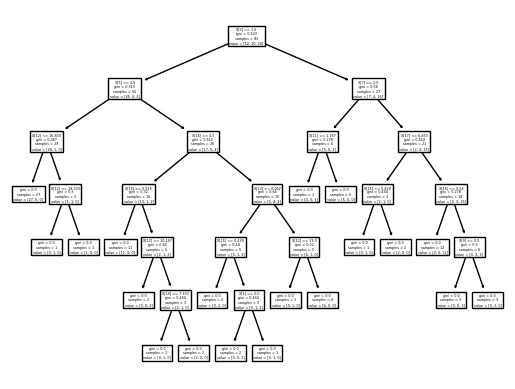

In [94]:
sklearn.tree.plot_tree(FINAL,max_depth=7)